In [2]:
import math
import csv
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
sim = rebound.Simulation()

sim.add(["Sun", "Mercury", "Venus", "Earth", "Mars"],date="2000-01-01 00:00")
sim.save("sim_bins/ss.bin")
sim.add(["Jupiter", "Saturn", "Uranus", "Neptune"],date="2000-01-01 00:00")
sim.save("sim_bins/full_ss.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [3]:
sim = rebound.Simulation("sim_bins/full_ss.bin")

sim.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	9
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.007139143380212697 y=-0.002792019770161695 z=0.0002061838852554664 vx=0.00031241890630844004 vy=-0.0004308175076914913 vz=-5.477740167511035e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.1478672233442572 y=-0.4466929775364947 z=-0.02313937582786785 vx=1.2309105821421804 vy=-0.41305345498361457 vz=-0.14666379884253236>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7257693602841775 y=-0.02529582082587794 z=0.041378025262080086 vx=0.030165331589789884 vy=-1.1808763946096659 vz=-0.017862281779832963>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.17568959237103887 y=0.9659716389047319 z=0.00020503203579145908 vx=-1.001310146440286 vy=-0.17559977987521952 vz=

In [7]:
# add a satellite, specify planet and velocities
def satellite_launch(launchPlanetIndex, escapeVx, escapeVy, escapeVz):
    sim.add(m=5.03e-28,
            x=sim.particles[launchPlanetIndex].x,
            y=sim.particles[launchPlanetIndex].y,
            z=sim.particles[launchPlanetIndex].z,
            vx=float(escapeVx), vy=float(escapeVy), vz=float(escapeVz)
           )

(<Figure size 576x576 with 3 Axes>,
 <matplotlib.axes._axes.Axes at 0x1187c6510>)

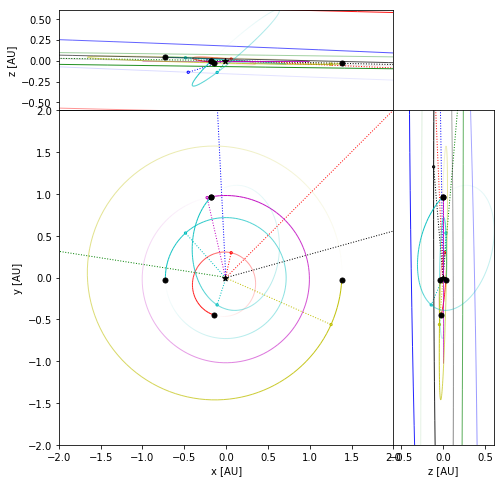

In [9]:
rebound.OrbitPlot(sim, slices=0.3, unitlabel="[AU]", color=True, periastron=True, xlim=[-2.,2.], ylim=[-2.,2.])

In [8]:
satellite_launch(3, 0.5, 0.5, 0.5)

In [ ]:
#JUNO values for 2011 AUG 08 13:00:00
# earth -- planet 3, 3625kg, x=108916861km,y=  

In [10]:
times = 100
for t in range(times):
    sim.dt = sim.particles[3].P/(365.*5)
    sim.step()

In [ ]:
def value_attribution(planet_index):
    sim.particles[planet_index].z